# Statistical Methods for Decision Making - Project

### Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn  import venn2, venn3, venn2_circles, venn2_unweighted, venn3_circles, venn3_unweighted
import matplotlib.lines as mlines
import seaborn as sns
import statistics
import warnings
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power


warnings.filterwarnings('ignore')

In [21]:
#Controlling figure aesthetics
sns.set_style("darkgrid") 

In [22]:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

<font size=5><span style="color:darkred">Problem 1</span></font>

<font size=4><span style="color:purple">Wholesale Customers Analysis</span>

<span style="color:green">Problem Statement:</span>
    
    

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [23]:
#Importing wholesale csv

wholesale = pd.read_csv('Wholesale+Customers+Data.csv')
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [24]:
#Checking the structure of the wholesale data

print(color.BOLD+color.RED+'Total dimension for wholesale dataset:'+color.END,wholesale.shape)
print(color.BOLD+color.BLUE+'Total rows in wholesale dataset:'+color.END,wholesale.shape[0])
print(color.BOLD+color.BLUE+'Total columns in wholesale dataset:'+color.END,wholesale.shape[1])

Total dimension for wholesale dataset: (440, 9)
Total rows in wholesale dataset: 440
Total columns in wholesale dataset: 9


In [25]:
#Checking the info of the data

wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [26]:
#Checking to see if there are any null values

wholesale.isnull().values.any()

False

In [27]:
#Dividing the columns into numerical and categorical

numerical = wholesale.describe().columns.to_list()
categorical = wholesale.select_dtypes('object').columns.to_list()
numerical.remove('Buyer/Spender')


print(color.BOLD+color.RED+'Numerical Columns: \n\n'+color.END,numerical)
print()
print(color.BOLD+color.PURPLE+'Total number of numerical columns: '+color.END,len(numerical))
print()
print(color.BOLD+color.RED+'Categorical Columns: \n\n'+color.END,categorical)
print()
print(color.BOLD+color.PURPLE+'Total number of categorical columns: '+color.END,len(categorical))

Numerical Columns: 

 ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

Total number of numerical columns:  6

Categorical Columns: 

 ['Channel', 'Region']

Total number of categorical columns:  2


### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [28]:
#Creating the total column that reflects actual amount spent by the particular region/channel
wholesale['Total'] = wholesale[['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1)

In [29]:
wholesale.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [30]:
wholesale.describe(exclude=np.number).T

,count,unique,top,freq
Channel,440,2,Hotel,298
Region,440,3,Other,316


In [31]:
region_spent = wholesale.pivot_table(columns='Region',values='Total',aggfunc=np.sum)
region_spent

Region,Lisbon,Oporto,Other
Total,2386813,1555088,10677599


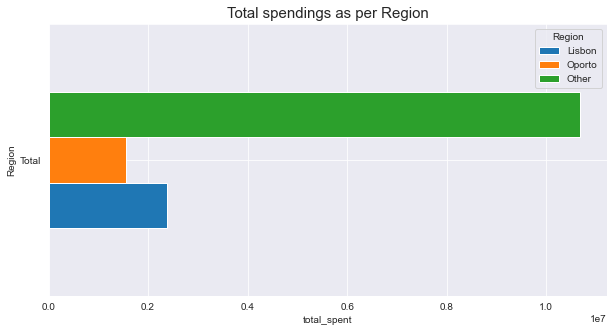

In [32]:
region_spent.plot.barh(figsize=[10,5])
plt.title('Total spendings as per Region',fontsize=15)
plt.xlabel('total_spent')
plt.ylabel('Region');

In [33]:
channel_spent = wholesale.pivot_table(columns='Channel',values='Total',aggfunc=np.sum)
channel_spent

Channel,Hotel,Retail
Total,7999569,6619931


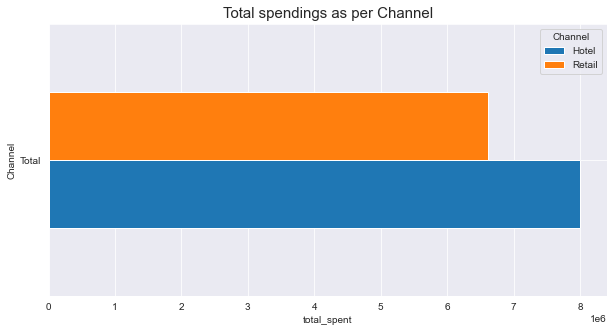

In [34]:
channel_spent.plot.barh(figsize=[10,5])
plt.title('Total spendings as per Channel',fontsize=15)
plt.xlabel('total_spent')
plt.ylabel('Channel');

`Analysis`

+ Other (10,677,599) region spent most.


+ Lisbon (2,386,813) comes second close and Oporto (1,555,088) region spent the least


+ Hotel spent the most (7,999,569) and Retail spent the least (6,619,931)

In [35]:
total_spent = wholesale.pivot_table(index='Region',columns='Channel',values='Total',aggfunc=np.sum)
total_spent

Channel,Hotel,Retail
Region,,
Lisbon,1538342,848471
Oporto,719150,835938
Other,5742077,4935522


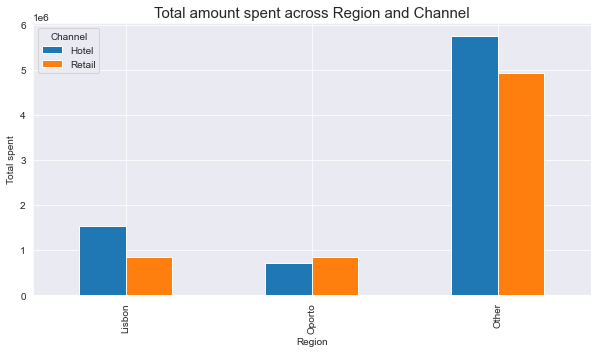

In [36]:
total_spent.plot.bar(figsize=[10,5])
plt.title('Total amount spent across Region and Channel',fontsize=15)
plt.ylabel('Total spent');

In [37]:
pd.crosstab(wholesale.Channel,wholesale.Region)

Region,Lisbon,Oporto,Other
Channel,,,
Hotel,59,28,211
Retail,18,19,105


<span style="color:darkred">From the above data, we can infer the following</span>

Channel has two unique values, with "Hotel" as most frequent with 298 out of 440 transactions i.e. 67.7% of spendings and Retail as least frequent with 142 out of 440 transactions i.e. 32.27%

Region has three unique values, with "Other" as most frequent with 316 out of 440 transactions i.e.71.8% of spendings and Lisbon ranking 2nd with 77 out of 440 transactions i.e. 17.5% of spendings. Least frequent is Oporto with 47 out of 440 transactions i.e.10.68%


### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [38]:
totals = wholesale[numerical].values.sum()

In [39]:
regions = wholesale.pivot_table(index=wholesale.Region,columns=wholesale.Channel,aggfunc=np.cov)
regions = regions.drop('Buyer/Spender',axis=1).drop('Total',axis=1).T
regions

Region                          Lisbon        Oporto         Other
                 Channel                                          
Delicatessen     Hotel    1.488267e+06  1.116781e+06  1.341891e+07
                 Retail   2.645459e+06  1.135158e+06  4.490382e+06
Detergents_Paper Hotel    1.705395e+06  1.808890e+05  1.209935e+06
                 Retail   3.042492e+07  6.867020e+07  3.626558e+07
Fresh            Hotel    1.523252e+08  8.044947e+07  2.174614e+08
                 Retail   2.932787e+07  4.716852e+07  9.284082e+07
Frozen           Hotel    1.073519e+07  1.312051e+08  2.456779e+07
                 Retail   5.879532e+06  6.117047e+06  2.263516e+06
Grocery          Hotel    1.317432e+07  9.292126e+06  1.291329e+07
                 Retail   1.084657e+08  1.969940e+08  1.512638e+08
Milk             Hotel    1.847557e+07  8.812756e+06  2.032662e+07
                 Retail   4.368181e+07  4.371000e+07  1.118270e+08

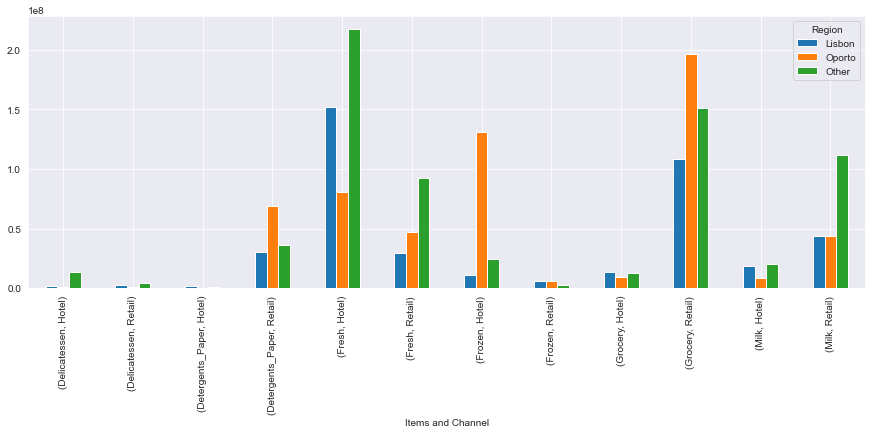

In [40]:
regions.plot.bar(figsize=[15,5])
plt.xlabel('Items and Channel');

+ Fresh item have high covariance in Hotel channel for Lisbon and Other regions.


+ Grocery has the highest covariance in Oporto region along with Frozen items.


+ Delicatessen in both hotel and retail channel has low covariance across all regions.


+ Detergents_Paper in hotel channel has low variance for all regions.

In [41]:
descr_stats = wholesale[numerical].describe().T
descr_stats['Variance'] = wholesale[numerical].var()
descr_stats['IQR'] = descr_stats['75%']-descr_stats['25%']
descr_stats['Range'] = descr_stats['max']-descr_stats['min']
descr_stats.rename(columns={'count':'Count',
                            'mean':'Mean',
                            'std':'Standard Deviation',
                            '25%':'Q1 (25%)',
                            '50%':'Q2 (50%)',
                            '75%':'Q3 (75%)'},inplace=True)
descr_stats

,Count,Mean,Standard Deviation,min,Q1 (25%),Q2 (50%),Q3 (75%),max,Variance,IQR,Range
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.599549e+08,13806.00,112148.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5.446997e+07,5657.25,73443.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,9.031010e+07,8502.75,92777.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2.356785e+07,2812.00,60844.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,2.273244e+07,3665.25,40824.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,7.952997e+06,1412.00,47940.0


<span style="color:blue">Fresh item (440 transactions):</span>

With the mean of 12000.297727, standard deviation of 12647.328865, range is (max-min) 112148.0 (112151.0 - 3.0).

The Q1(25%) of the data is upto 3127.75, Q3(75%) is 16933.8, with Q2(50%) 8504

IQR = Q3-Q1 = 16933.8-3127.75 = 13,806.05


<span style="color:blue">Milk item (440 transactions):</span>

Mean of 5796.27, standard deviation of 7380.38, range is (max-min) 73443.0.

The Q1(25%) of the data is upto 1533, Q3(75%) is 7190.25, with Q2(50%) 3627

IQR = Q3-Q1 = 7190.25-1533 = 5657.25

<span style="color:blue">Grocery item (440 transactions)</span>

Mean of 7951.28, standard deviation of 9503.16, range = max-min =92780-3=92777 

The Q1(25%) is 2153, Q3(75%) is 10655.8, with Q2(50%) 4755.5

IQR = Q3-Q1 = 10655.8-2153 = 8502.8 

<span style="color:blue">Frozen (440 transactions):</span>

Mean of 3071.93, standard deviation of 4854.67, range = max-min =60869-25=60844 

Q1(25%) is 742.25, Q3(75%) is 3554.25, with Q2(50%) 1526

IQR = Q3-Q1 = 3554.25-742.25 = 2812

<span style="color:blue">Detergents_Paper (440 transactions):</span>

Mean of 2881.49, standard deviation of 4767.85, range = max-min =40827-3=40824 

Q1(25%) is 256.75, Q3(75%) is 3922, with Q2(50%) 816.5

IQR = Q3-Q1 = 3922-256.75 = 3665.25

<span style="color:blue">Delicatessen (440 transactions):</span>

Mean of 1524.87, standard deviation of 2820.11, range = max-min =47943-3=47940 

Q1(25%) is 408.25, Q3(75%) is 1820.25, with Q2(50%) 965.5

IQR = Q3-Q1 = 1820.25-408.25 = 1412 

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [42]:
#Calculating the covariance for each item across all channel/region
print(color.BOLD+'Items behaviour based on standard deviation:\n'+color.END)
    
for i in numerical:
    sd = wholesale[i].std()
    print(color.BOLD+i+color.END,round(sd,4))
    

print(color.BOLD+'\nItems behaviour based on coefficient of variation:\n'+color.END)

for i in numerical:
    cv = np.std(wholesale[i]) / np.mean(wholesale[i])
    print(color.BOLD+i+color.END,round(cv,4))

Items behaviour based on standard deviation:

Fresh 12647.3289
Milk 7380.3772
Grocery 9503.1628
Frozen 4854.6733
Detergents_Paper 4767.8544
Delicatessen 2820.1059

Items behaviour based on coefficient of variation:

Fresh 1.0527
Milk 1.2719
Grocery 1.1938
Frozen 1.5785
Detergents_Paper 1.6528
Delicatessen 1.8473


<span style="color:brown">Based on Standard Deviation: </span>

`Delicatessen` has the lowest standard deviation of 2820.1059 and thus is the consistent.

`Frozen` has the highest standard deviation of 12647.3289 and thus is the most inconsistent.

<span style="color:brown">Based on coefficient of variation: </span>

`Fresh` has lowest variance of 1.0527 | It has the least inconsistent behaviour means less varying.


`Delicatessen` has the highest variance of 1.8473 | It has the most inconsistent behaviour which means most varying.

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<strong style="color: darkcyan; opacity: 0.80;">Using the IQR Score.</strong>
+ Sort the dataset in increasing order.


+ Calculate the first quartile(Q1) and third quartile(Q3)


+ Find Interquartile range (Q3-Q1)


+ Find the Lower Bound = (Q1 -1.5 * IQR)


+ Find the Upper Bound = (Q3 +1.5 * IQR)


+ Anything that lies above or below the upper and lower bound is an outlier.

In [43]:
#calculating IQR
sorted(wholesale)

Q1=wholesale[numerical].quantile(0.25)
Q3=wholesale[numerical].quantile(0.75)
IQR=Q3-Q1
print(color.BOLD+'IQR of the items\n'+color.END)
print(IQR)

IQR of the items

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64


In [44]:
#filtering lower and upper bound and identifying the outliers
iqr = ((wholesale < (Q1 - 1.5 * IQR)) |(wholesale > (Q3 + 1.5 * IQR))).any()
iqr = iqr.to_frame().reset_index().rename(columns={'index':'Columns',0:'Outliers'})
outliers = iqr[iqr['Outliers']==True]
outliers

,Columns,Outliers
2,Delicatessen,True
3,Detergents_Paper,True
4,Fresh,True
5,Frozen,True
6,Grocery,True
7,Milk,True


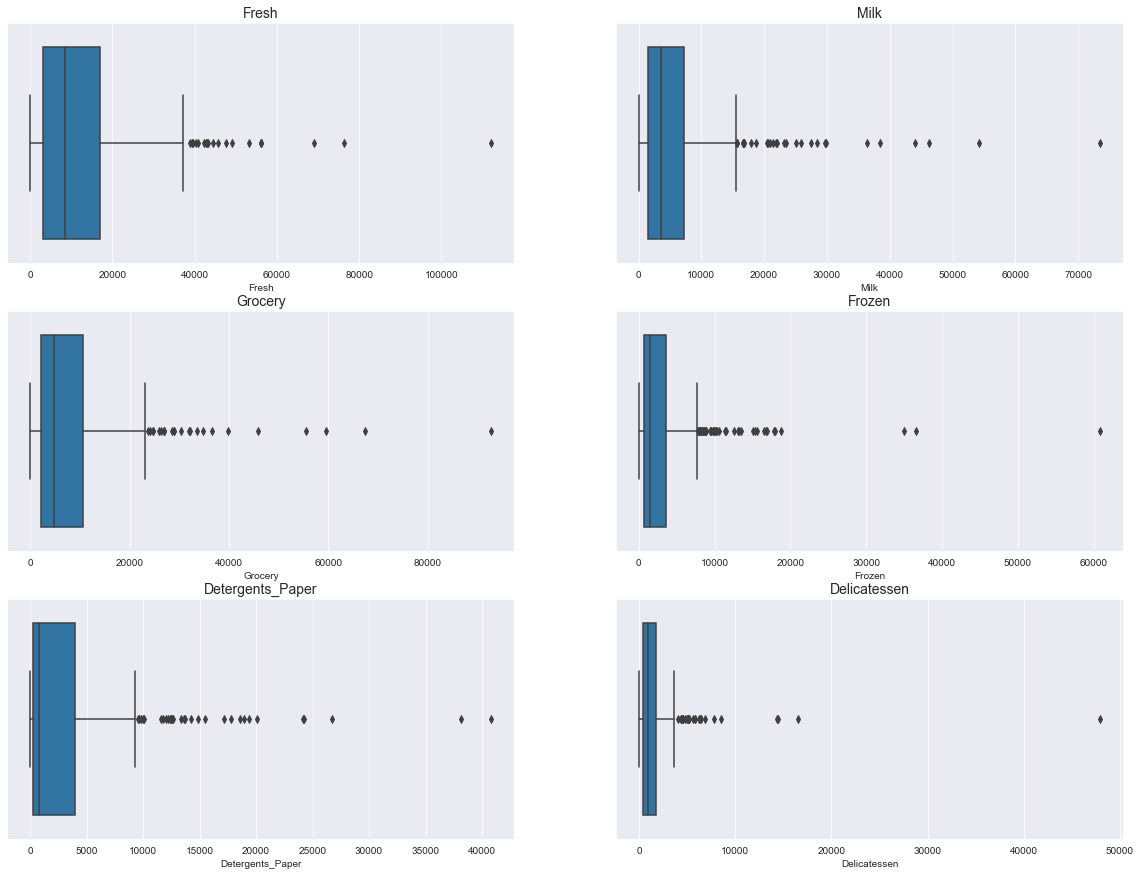

In [45]:
# Graphical representation
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[20,15])
for c,i in zip(numerical,axes.flatten()):
    sns.boxplot(wholesale[c],ax = i)
    i.set_title(c,fontsize=14)

`'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen' has outliers`

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

Channel has two unique values, with "Hotel" as most frequent with 298 out of 440 transactions i.e. 67.7% of spendings and Retail as least frequent with 142 out of 440 transactions i.e. 32.27%.


Region has three unique values, with "Other" as most frequent with 316 out of 440 transactions i.e.71.8% of spendings and Lisbon ranking 2nd with 77 out of 440 transactions i.e. 17.5% of spendings. Least frequent is Oporto with 47 out of 440 transactions i.e.10.68%


The distributer should focus more on Hotel channel in other regions provided most of it's transactions are carried out from there. 


For retail channel the focus should be more on Oporto region. Items such as fresh, grocery and frozen have the highest demand.


Since Fresh items has the least inconsistent behaviour the distributor should continue to supply across all regions and channels.

<font size=5><span style="color:darkred">Problem 2</span>

<font size=4><span style="color:green">Problem Statement:</span>
    
    

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [46]:
#importing the survey csv
cmsu = pd.read_csv('Survey-1.csv')
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [47]:
#checking the structure of the dataset

print(color.BOLD+color.RED+'Total dimension for CMSU Survey dataset:'+color.END,cmsu.shape)
print(color.BOLD+color.BLUE+'Total rows in CMSU Survey dataset:'+color.END,cmsu.shape[0])
print(color.BOLD+color.BLUE+'Total columns in CMSU Survey dataset:'+color.END,cmsu.shape[1])

Total dimension for CMSU Survey dataset: (62, 14)
Total rows in CMSU Survey dataset: 62
Total columns in CMSU Survey dataset: 14


In [48]:
#Checking the info of the data

cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [49]:
#checking if there are any null values in the dataset
cmsu.isnull().values.any()

False

In [50]:
#Dividing the columns into numerical and categorical

numerical = cmsu.describe().columns.to_list()
categorical = cmsu.select_dtypes('object').columns.to_list()
numerical.remove('ID')


print(color.BOLD+color.RED+'Numerical Columns: \n\n'+color.END,numerical)
print()
print(color.BOLD+color.PURPLE+'Total number of numerical columns: '+color.END,len(numerical))
print()
print(color.BOLD+color.RED+'Categorical Columns: \n\n'+color.END,categorical)
print()
print(color.BOLD+color.PURPLE+'Total number of categorical columns: '+color.END,len(categorical))

Numerical Columns: 

 ['Age', 'GPA', 'Salary', 'Social Networking', 'Satisfaction', 'Spending', 'Text Messages']

Total number of numerical columns:  7

Categorical Columns: 

 ['Gender', 'Class', 'Major', 'Grad Intention', 'Employment', 'Computer']

Total number of categorical columns:  6


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

#### 2.1.2. Gender and Grad Intention

#### 2.1.3. Gender and Employment

#### 2.1.4. Gender and Computer

In [51]:
#2.1.1. Gender and Major
major = pd.crosstab(cmsu.Gender,cmsu.Major)
major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


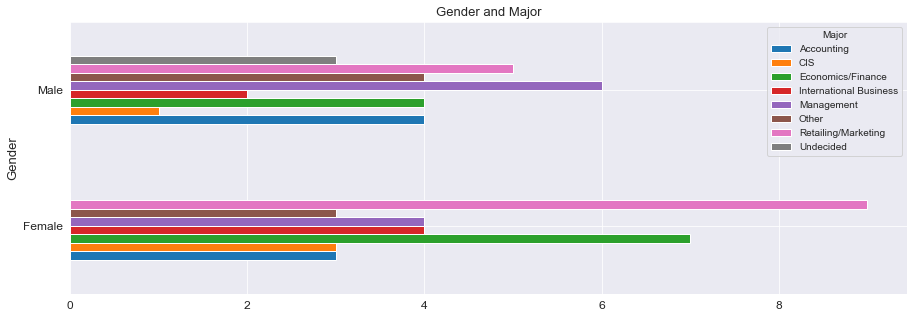

In [52]:
major.plot.barh(figsize=[15,5])
plt.ylabel('Gender',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Gender and Major',fontsize=13);

In [66]:
# 2.1.2. Gender and Grad Intention

grad_intention = pd.crosstab(cmsu.Gender,cmsu['Grad Intention'],margins=True)
grad_intention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


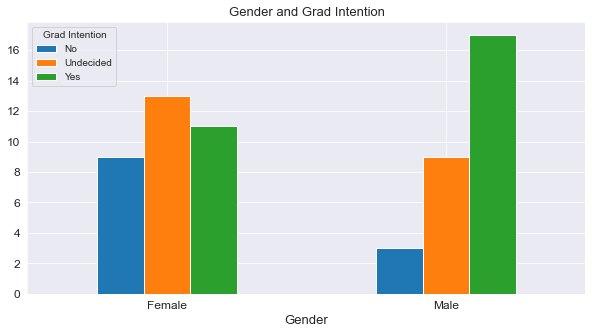

In [54]:
grad_intention.plot.bar(figsize=[10,5])
plt.xlabel('Gender',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=360)
plt.title('Gender and Grad Intention',fontsize=13);

In [55]:
# 2.1.3. Gender and Employment

employ = pd.crosstab(cmsu.Gender,cmsu.Employment)
employ

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


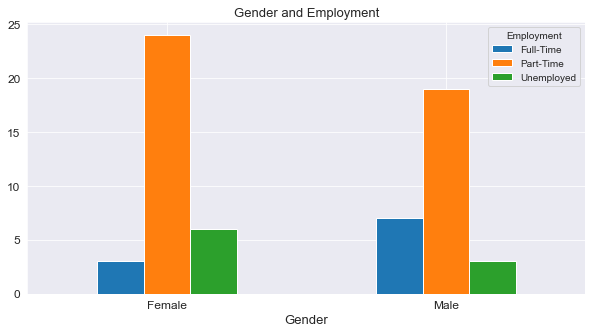

In [56]:
employ.plot.bar(figsize=[10,5])
plt.xlabel('Gender',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=360)
plt.title('Gender and Employment',fontsize=13);

In [69]:
# 2.1.4. Gender and Computer

computer = pd.crosstab(cmsu.Gender,cmsu.Computer,margins=True)
computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


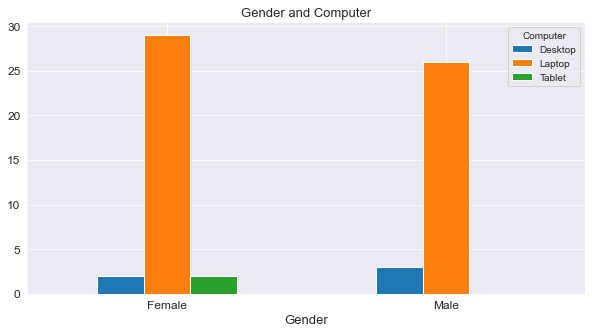

In [58]:
computer.plot.bar(figsize=[10,5])
plt.xlabel('Gender',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,rotation=360)
plt.title('Gender and Computer',fontsize=13);

### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [59]:
#Let's check the values counts in Gender
cmsu.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [60]:
# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

total_male = (cmsu.Gender == 'Male').values.sum()
total_students = cmsu.shape[0]
prob_male = round(total_male/total_students,4)



print(color.BOLD+'Total number of Males in CMSU ='+color.END,total_male)
print(color.BOLD+'Total number of students in CMSU ='+color.END,total_students)
print(color.BLUE+color.BOLD+'Probability that a randomly selected CMSU student will be male is: '+color.END,prob_male,
      'or',prob_male*100,'%')

Total number of Males in CMSU = 29
Total number of students in CMSU = 62
Probability that a randomly selected CMSU student will be male is:  0.4677 or 46.77 %


In [61]:
# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

total_female = (cmsu.Gender == 'Female').values.sum()
total_students = cmsu.shape[0]
prob_female = round(total_female/total_students,4)



print(color.BOLD+'Total number of Females in CMSU ='+color.END,total_female)
print(color.BOLD+'Total number of students in CMSU ='+color.END,total_students)
print(color.BLUE+color.BOLD+'Probability that a randomly selected CMSU student will be female is: '+color.END,prob_female,
      'or',prob_female*100,'%')

Total number of Females in CMSU = 33
Total number of students in CMSU = 62
Probability that a randomly selected CMSU student will be female is:  0.5323 or 53.23 %


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [62]:
#contingency table for different majors
major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [63]:
# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

print(color.BLUE+color.BOLD+'Total number of Males in CMSU ='+color.END,total_male)

for i in major.columns:
    a = major.loc['Male',i]
    prob = round(a/total_male,4)
    print(color.BOLD+'\nTotal number of males in',i,'major: '+color.END,a,'\n',
          color.PURPLE+color.BOLD+'Probability of',i,'majors among the male students of CMSU:'+color.END,prob,
         'or',prob*100,'%')

Total number of Males in CMSU = 29

Total number of males in Accounting major:  4 
 Probability of Accounting majors among the male students of CMSU: 0.1379 or 13.79 %

Total number of males in CIS major:  1 
 Probability of CIS majors among the male students of CMSU: 0.0345 or 3.45 %

Total number of males in Economics/Finance major:  4 
 Probability of Economics/Finance majors among the male students of CMSU: 0.1379 or 13.79 %

Total number of males in International Business major:  2 
 Probability of International Business majors among the male students of CMSU: 0.069 or 6.9 %

Total number of males in Management major:  6 
 Probability of Management majors among the male students of CMSU: 0.2069 or 20.69 %

Total number of males in Other major:  4 
 Probability of Other majors among the male students of CMSU: 0.1379 or 13.79 %

Total number of males in Retailing/Marketing major:  5 
 Probability of Retailing/Marketing majors among the male students of CMSU: 0.1724 or 17.24 %

Total

In [64]:
# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

print(color.RED+color.BOLD+'Total number of Females in CMSU ='+color.END,total_female)

for i in major.columns:
    a = major.loc['Female',i]
    prob = round(a/total_female,4)
    print(color.BOLD+'\nTotal number of females in',i,'major: '+color.END,a,'\n',
          color.DARKCYAN+color.BOLD+'Probability of',i,'majors among the females students of CMSU:'+color.END,prob,
          'or',round(prob*100,4),'%')

Total number of Females in CMSU = 33

Total number of females in Accounting major:  3 
 Probability of Accounting majors among the females students of CMSU: 0.0909 or 9.09 %

Total number of females in CIS major:  3 
 Probability of CIS majors among the females students of CMSU: 0.0909 or 9.09 %

Total number of females in Economics/Finance major:  7 
 Probability of Economics/Finance majors among the females students of CMSU: 0.2121 or 21.21 %

Total number of females in International Business major:  4 
 Probability of International Business majors among the females students of CMSU: 0.1212 or 12.12 %

Total number of females in Management major:  4 
 Probability of Management majors among the females students of CMSU: 0.1212 or 12.12 %

Total number of females in Other major:  3 
 Probability of Other majors among the females students of CMSU: 0.0909 or 9.09 %

Total number of females in Retailing/Marketing major:  9 
 Probability of Retailing/Marketing majors among the females stud

### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [65]:
#contingency table for graduation intentions 
grad_intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


Total number of students that are male and intends to graduate = 17
Total number of students that intends to graduate in CMSU = 62
Probability that a randomly chosen student is a male and intends to graduate:  0.2742 or 27.42 %



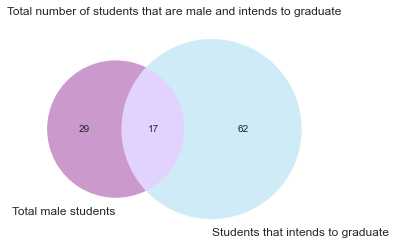

In [68]:
# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

grad_yes = grad_intention.Yes.values.sum()
total = grad_intention.loc['All','All']
grad = grad_intention.loc['Male','Yes']
prob_grad = round(grad/total,4)


print(color.BOLD+'Total number of students that are male and intends to graduate ='+color.END,grad)

print(color.BOLD+'Total number of students that intends to graduate in CMSU ='+color.END,total)

print(color.RED+color.BOLD+'Probability that a randomly chosen student is a male and intends to graduate: '+color.END,
      prob_grad,'or',round(prob_grad*100,4),'%')

print()


################################################################################
venn2([total_male,total,grad],
      ['Total male students','Students that intends to graduate'],
     set_colors=('purple', 'skyblue'))
plt.title('Total number of students that are male and intends to graduate');

In [70]:
#contingency table for computer owned
computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


Total number of students that are Female and have a desktop = 2
Total number of students that are Female and have a tablet = 2
Probability that a randomly selected student is a female and does NOT have a laptop:  0.0645 or 6.45 %



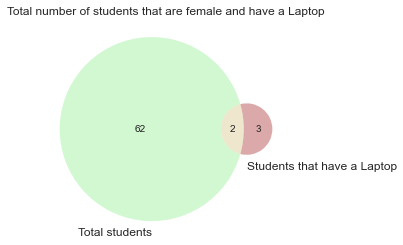

In [74]:
# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

#prob of female having a Laptop
FnL = computer.loc['Female','Desktop']
FnT = computer.loc['Female','Tablet']
total = computer.loc['All','All']
prob_FnL = round((FnL+FnT)/total,4)
#1-(prob of female having a laptop)
# prob_FnLc = round(1-prob_FnL,4)


print(color.BOLD+'Total number of students that are Female and have a desktop ='+color.END,FnL)
print(color.BOLD+'Total number of students that are Female and have a tablet ='+color.END,FnT)


print(color.YELLOW+color.BOLD+'Probability that a randomly selected student is a female and',
      color.UNDERLINE+'does NOT have a laptop: '
      +color.END,prob_FnL,'or',round(prob_FnL*100,4),'%')

print()

################################################################################

venn2([total,computer['All'].value_counts().sum(),FnL],
      ['Total students','Students that have a Laptop'],
     set_colors=('lightgreen', 'brown'))
plt.title('Total number of students that are female and have a Laptop');

### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [48]:
#contingency table for employment status
employ

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


Probability that a randomly chosen student is a male:  0.4677 or 46.77 %
Probability that a randomly chosen student has full-time employment:  0.1613 or 16.13 %
Probability that a randomly chosen student is a male and has full-time employment:  0.1129 or 11.29 %
Probability that a randomly chosen student is either a male or has full-time employment:  0.5161 or 51.61 %



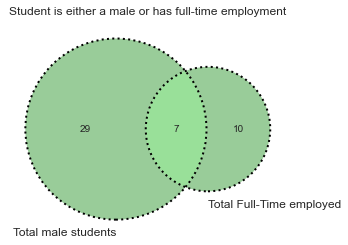

In [49]:
# 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

#prob of a randomly chosen student is a male
print(color.BOLD+'Probability that a randomly chosen student is a male: '+color.END,
      prob_male,'or',prob_male*100,'%')

#prob of a randomly chosen student has full-time employment
FTE = employ['Full-Time'].values.sum()
prob_FTE = round(FTE/total_students,4)

print(color.BOLD+'Probability that a randomly chosen student has full-time employment: '+color.END,
      prob_FTE,'or',prob_FTE*100,'%')

#prob that a randomly chosen student is a male and has full-time employment?
male_FTE = employ.loc['Male','Full-Time']
prob_Mnf = round(male_FTE/total_students,4)

print(color.BOLD+'Probability that a randomly chosen student is a male and has full-time employment: '
      +color.END,prob_Mnf,'or',prob_Mnf*100,'%')


#prob that a randomly chosen student is either a male or has full-time employment?
prob_MuF = round(prob_male + prob_FTE - prob_Mnf,4)



print(color.BLUE+color.BOLD+'Probability that a randomly chosen student is either a male or has full-time employment: '
      +color.END,prob_MuF,'or',prob_MuF*100,'%')
print()

################################################################################

venn2([total_male,FTE,male_FTE],['Total male students','Total Full-Time employed'],
      set_colors=('green', 'green'))
venn2_circles([total_male,FTE,male_FTE],linestyle='dotted')
plt.title('Student is either a male or has full-time employment');

In [50]:
#contingency table for different measures
major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


Total number of Females in CMSU = 33

Total number of Females majoring in International Business = 4 / 33
Probability that given a female student is randomly chosen and she is majoring in International Business: 0.1212 or 12.12 %

Total number of Females majoring in Management = 4 / 33
Probability that given a female student is randomly chosen and she is majoring in Management: 0.1212 or 12.12 %

Probability that given a female student is randomly chosen, she is majoring in international business or management: 0.2424 or 24.24 %



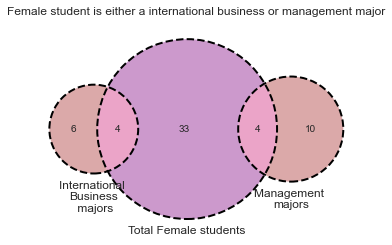

In [51]:
# 2.5.2. Find the conditional probability that given a female student is randomly chosen, 
#she is majoring in international business or management.

#prob of females majoring in International Business
IB = major['International Business'].values.sum()
FnIB = major.loc['Female','International Business']
prob_IB = round(FnIB/total_female,4)

#prob of females majoring in International Business
mgmt = major['Management'].values.sum()
FnM = major.loc['Female','Management']
prob_M = round(FnM/total_female,4)

#prob of female majoring in International Business or Management 
IBuM = round(prob_IB + prob_M,4)

################################################################################
print(color.RED+color.BOLD+'Total number of Females in CMSU ='+color.END,total_female)
print()
print(color.BOLD+'Total number of Females majoring in International Business ='+color.END,FnIB,'/',total_female)
print(color.PURPLE+color.BOLD+
      'Probability that given a female student is randomly chosen and she is majoring in International Business:'
      +color.END,prob_IB,'or',round(prob_IB*100,4),'%')
print()
print(color.BOLD+'Total number of Females majoring in Management ='+color.END,FnM,'/',total_female)
print(color.PURPLE+color.BOLD+
      'Probability that given a female student is randomly chosen and she is majoring in Management:'
      +color.END,prob_M,'or',round(prob_M*100,4),'%')
print()
print(color.DARKCYAN+color.BOLD+
      'Probability that given a female student is randomly chosen, she is majoring in international business or management:'
      +color.END,IBuM,'or',round(IBuM*100,4),'%')
print()
################################################################################

venn3([total_female,IB,FnIB,mgmt,FnM,0,0],
      ['Total Female students','International \nBusiness\n majors','Management \nmajors'],
      set_colors=['purple','brown','brown'])
venn3_circles([total_female,IB,FnIB,mgmt,FnM,0,0],linestyle='dashed')
plt.title('Female student is either a international business or management major');

### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [52]:
#Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No)
grad_intention.drop('Undecided',axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [53]:
#Do you think the graduate intention and being female are independent events?

#prob of student is a female > p(female)

print(color.BOLD+'Probability that a randomly selected CMSU student will be female is:'+color.END,
      total_female,'/',total_students,'=',prob_female,
      'or',prob_female*100,'%')

#prob of student intends to graduate > p(yes) 

yes = round(grad_yes/total_students,4)
print(color.BOLD+'Probability that a students intends to graduate from CMSU ='+color.END,
      grad_yes,'/',total_students,'=',yes,
     'or',yes*100,'%\n')

#if p(female)*p(yes) == p(female and yes) ----> then the events are independent

female_into_yes = prob_female*yes

print(color.BLUE+color.BOLD+
      'Product of the probabilities that a student will be female and that a students intends to graduate from CMSU is='
      +color.END,prob_female,'*',yes,'=',round(female_into_yes,4),'or',round(female_into_yes*100,4),'%\n')


#prob of student is a female and intends to graduate > p(female and yes)

FnG = grad_intention.loc['Female','Yes']
p_FnG = round(FnG/total_students,4)

print(color.RED+color.BOLD+'Probability that a student is female and intends to graduate from CMSU ='+color.END,
      FnG,'/',total_students,'=',p_FnG,
     'or',round(p_FnG*100,4),'%\n')

######################################################################################

print(color.BOLD+
      'Events are independent if the probability of an event occurring together is the product of their individual probabilities.',
      '\n\nSince the probability that a student is female and intends to graduate from CMSU does',
      color.RED+color.UNDERLINE+'NOT equal'+color.END,color.BOLD+
     'to the product of the \nprobabilities that a student will be female and that a students intends to graduate from CMSU.\n',
      color.GREEN+color.BOLD+
      '\n Therefore, it concludes that the graduate intention and being female are NOT independent events')

Probability that a randomly selected CMSU student will be female is: 33 / 62 = 0.5323 or 53.23 %
Probability that a students intends to graduate from CMSU = 28 / 62 = 0.4516 or 45.16 %

Product of the probabilities that a student will be female and that a students intends to graduate from CMSU is= 0.5323 * 0.4516 = 0.2404 or 24.0387 %

Probability that a student is female and intends to graduate from CMSU = 11 / 62 = 0.1774 or 17.74 %

Events are independent if the probability of an event occurring together is the product of their individual probabilities. 

Since the probability that a student is female and intends to graduate from CMSU does NOT equal to the product of the 
probabilities that a student will be female and that a students intends to graduate from CMSU.
 
 Therefore, it concludes that the graduate intention and being female are NOT independent events


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [54]:
# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

below_3 = cmsu[cmsu.GPA < 3].shape[0]

prob_GPA = below_3/total_students

print(color.BOLD+'Total number of students with GPA less than 3:'+color.END,below_3,'/',total_students)
print(color.PURPLE+color.BOLD+'Probability that a student is chosen randomly and that his/her GPA is less than 3:'
      +color.END,round(prob_GPA,4),'or',round(prob_GPA*100,4),'%')

Total number of students with GPA less than 3: 17 / 62
Probability that a student is chosen randomly and that his/her GPA is less than 3: 0.2742 or 27.4194 %


In [55]:
pd.crosstab(cmsu.Gender,cmsu.Salary>=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14



Probability that a randomly selected male earns 50 or more: 14 / 29 = 0.4828 or 48.2759 %

Probability that a randomly selected female earns 50 or more: 18 / 33 = 0.5455 or 54.5455 %


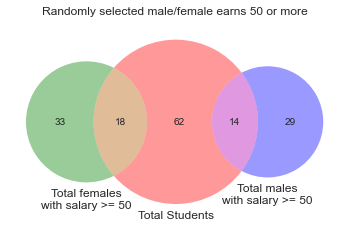

In [56]:
# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. 

male_sal_50 = (cmsu[cmsu.Salary >= 50][cmsu.Gender == 'Male']).shape[0]
prob_Mn50 = male_sal_50/total_male

print(color.GREEN+color.BOLD+'\nProbability that a randomly selected male earns 50 or more:'+color.END,
     male_sal_50,'/',total_male,'=',round(prob_Mn50,4),'or',round(prob_Mn50*100,4),'%\n')

# Find the conditional probability that a randomly selected female earns 50 or more.

female_sal_50 = (cmsu[cmsu.Salary >= 50][cmsu.Gender == 'Female']).shape[0]
prob_Fn50 = female_sal_50/total_female

print(color.PURPLE+color.BOLD+'Probability that a randomly selected female earns 50 or more:'+color.END,
     female_sal_50,'/',total_female,'=',round(prob_Fn50,4),'or',round(prob_Fn50*100,4),'%')

#######################################################

venn3([total_students,total_female,female_sal_50,total_male,male_sal_50,0,0],
      ['Total Students','Total females\nwith salary >= 50','Total males\nwith salary >= 50'])
plt.title('Randomly selected male/female earns 50 or more');

### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

In [57]:
continuous = ['GPA', 'Salary', 'Spending', 'Text Messages']

GPA : skewed = -0.3146
GPA is negatively skewed or left skewed

Salary : skewed = 0.5347
Salary is positively skewed or right skewed

Spending : skewed = 1.5859
Spending is positively skewed or right skewed

Text Messages : skewed = 1.2958
Text Messages is positively skewed or right skewed



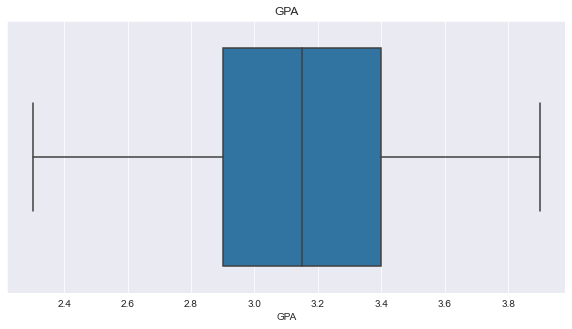

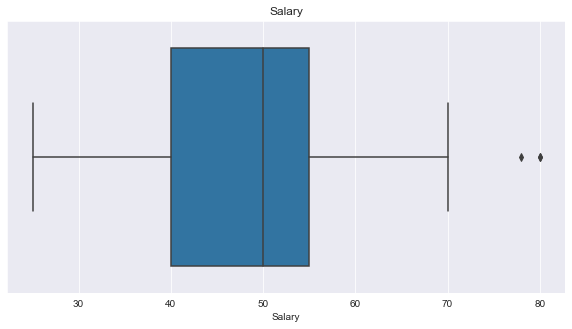

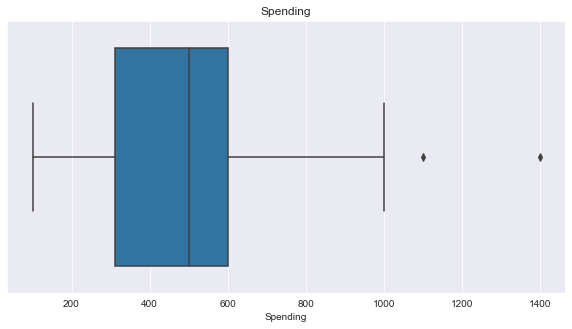

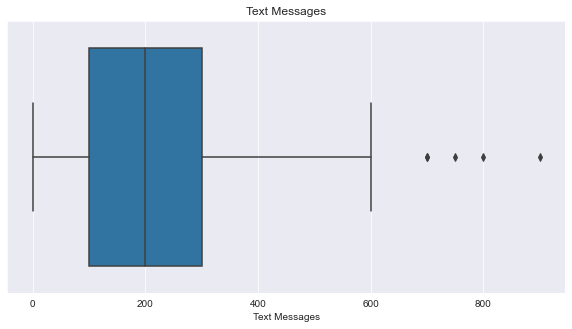

In [58]:
for i in continuous:
    skewed = (cmsu[i]).skew()
    print(color.BOLD+i,color.RED+': skewed ='+color.END,round(skewed,4))
    
    if skewed < 0:
        print(color.BOLD+color.BLUE+i,'is negatively skewed or left skewed\n'+color.END)
    elif skewed > 0:
        print(color.BOLD+color.BLUE+i,'is positively skewed or right skewed\n'+color.END)
    else:
        print(color.BOLD+color.BLUE+i,'is symmetric\n'+color.END)
        
    plt.figure(figsize=[10,5])
    sns.boxplot(cmsu[i])
    plt.title(i)

    

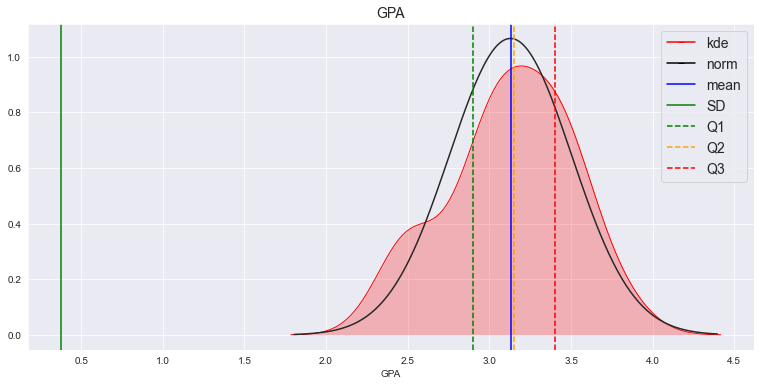

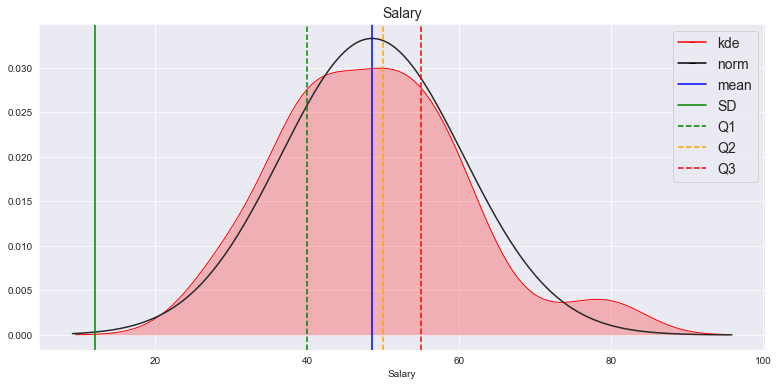

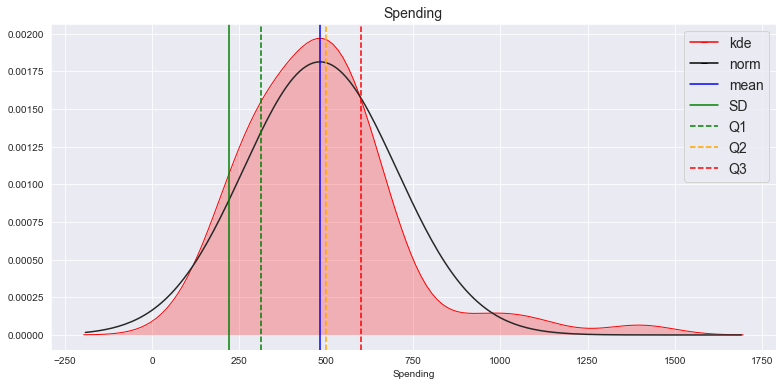

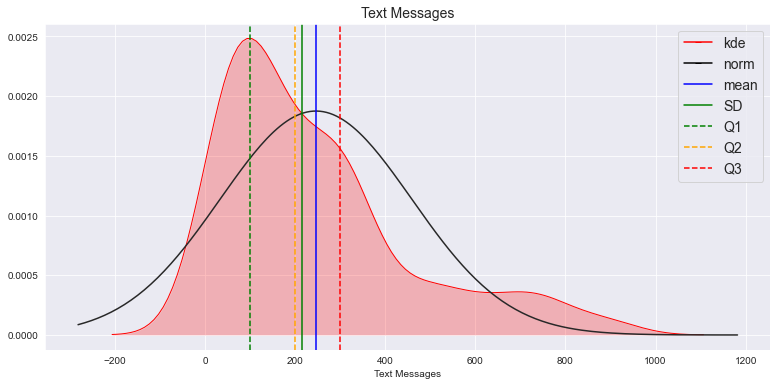

In [59]:
red_patch = mlines.Line2D([],[],color='red', marker='_',label='kde')
black_patch = mlines.Line2D([],[],color='black', marker='_',label='norm')

for i in continuous:
    SD = cmsu[i].std()
    MEAN = cmsu[i].mean()
  
    plt.figure(figsize=[13,6])
    sns.distplot(cmsu[i],hist=False,kde_kws={"shade":True,"color": "r","linewidth":1},fit=norm)
    
    Q1 = plt.axvline(x=(cmsu[i].quantile(0.25)),color='g',linestyle='--',label='Q1')
    Q2 = plt.axvline(x=(cmsu[i].quantile(0.5)),color='orange',linestyle='--',label='Q2')
    Q3 = plt.axvline(x=(cmsu[i].quantile(0.75)),color='r',linestyle='--',label='Q3')

    mean = plt.axvline(x=(MEAN),color='b',label='mean')
    sd = plt.axvline(x=(SD),color='g',label='SD')
    
    plt.legend(handles=[red_patch,black_patch,mean,sd,Q1,Q2,Q3],fontsize=14)
    plt.title(i,fontsize=14)

    plt.show()

#### Write a note summarizing your conclusions for this whole Problem 2.

Clear Mountain State University (CMSU) has total 62 students out of which 29 of them are male and 33 of them are female. The Management program is mostly dominated by males -probability that a male will major in management is 20.69% and the probability of retail/marketing major by a female is 27.27%; a female opting for economics/finance major is 21.21%. Even so, most of the female’s intention to graduate is still undecided with 17.74% have intentions to graduate, whereas the probability of a male and intentions to graduate are 60.71%.


Most of the students have a part-time job, 16.13% of a student has a full-time employment. 27.4194% of the students probably has the GPS less than 3.


<font size=5><span style="color:darkred">Problem 3</span>

<font size=4><span style="color:green">Problem Statement:</span>
    
    
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

---
    

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [60]:
shingles = pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [61]:
print(color.BOLD+color.RED+'Total dimension for shingles dataset:'+color.END,shingles.shape)
print(color.BOLD+color.BLUE+'Total rows in shingles dataset:'+color.END,shingles.shape[0])
print(color.BOLD+color.BLUE+'Total columns in shingles dataset:'+color.END,shingles.shape[1])

Total dimension for shingles dataset: (36, 2)
Total rows in shingles dataset: 36
Total columns in shingles dataset: 2


In [62]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [63]:
shingles.isnull().values.any()

True

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### __*Formulating the Hypothesis*__
* $H_0$ = The mean moisture content is less than equal to 0.35 pound per 100 square feet.
* $H_1$ = The mean moisture content is more than 0.35 pound per 100 square feet.

                               Null Hypothesis     Hο = μ ≦ 0.35
                                                                                     
                          Alternate Hypothesis     H_A = μ > 0.35
                                            
                                     

In [64]:
sample_mean_A = shingles.A.mean(skipna=True)
alpha = 0.05 #significance level
sd_A = shingles.A.std(skipna=True)
n_A = shingles.A.count()


t_statistic, p_value = ttest_1samp(shingles.A, 0.35,nan_policy='omit')


print(color.BOLD+'Sample Mean of A shingles:'+color.END,round(sample_mean_A,4),
      color.BOLD+'\nSample Std Deviation of A shingles:'+color.END,round(sample_mean_A,4),
      color.BOLD+'\nTotal number of observation for A shingles:'+color.END,n_A)
print(color.BOLD+'\nOne sample t test for A shingles'+color.END,
      '\nt statistic: {0} p value: {1} '.format(round(t_statistic,4), round(p_value,4)))

print(color.BOLD+color.RED+'\nLevel of significance or alpha'+color.END,alpha)

if p_value < alpha: 
    print(color.BOLD+'\nWe have evidence to reject the null hypothesis since p value < Level of significance'+color.END)
else:
    print(color.BOLD+'\nWe have no evidence to reject the null hypothesis since p value > Level of significance'+color.END) 

print (color.BOLD+color.RED+"Our one-sample t-test p-value="+color.END, round(p_value,4),
       color.BOLD+'\nwhich is greater than 5% level of significance\n'+color.END)

print(color.BOLD+color.BLUE+'At 95% confidence level, there is sufficient evidence to prove that mean moisture content is less than equal to 0.35 pound per 100 square feet.'
     +color.END)


Sample Mean of A shingles: 0.3167 
Sample Std Deviation of A shingles: 0.3167 
Total number of observation for A shingles: 36

One sample t test for A shingles 
t statistic: -1.4735 p value: 0.1496 

Level of significance or alpha 0.05

We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.1496 
which is greater than 5% level of significance

At 95% confidence level, there is sufficient evidence to prove that mean moisture content is less than equal to 0.35 pound per 100 square feet.


In [65]:
sample_mean_B = shingles.B.mean(skipna=True)
sd_B = shingles.B.std(skipna=True)
n_B = shingles.B.count()

t_statistic, p_value = ttest_1samp(shingles.B, 0.35,nan_policy='omit')


print(color.BOLD+'Sample Mean of B shingles:'+color.END,round(sample_mean_B,4),
      color.BOLD+'\nSample Std Deviation of B shingles:'+color.END,round(sample_mean_B,4),
      color.BOLD+'\nTotal number of observation for B shingles:'+color.END,n_B)
print(color.BOLD+'\nOne sample t test for B shingles'+color.END,
      '\nt statistic: {0} p value: {1} '.format(round(t_statistic,4), round(p_value,4)))

print(color.BOLD+color.RED+'\nLevel of significance or alpha'+color.END,alpha)

if p_value < alpha: 
    print(color.BOLD+'\nWe have evidence to reject the null hypothesis since p value < Level of significance'+color.END)
else:
    print(color.BOLD+'\nWe have no evidence to reject the null hypothesis since p value > Level of significance'+color.END) 

print (color.BOLD+color.RED+"Our one-sample t-test p-value="+color.END, round(p_value,4),
       color.BOLD+'\nwhich is less than 5% level of significance\n'+color.END)
print(color.BOLD+color.BLUE+'Hence, at 5% level of significance, there is not enough evidence that the mean moisture content is less than equal to \n0.35 pound per 100 square feet.'
     +color.END)

Sample Mean of B shingles: 0.2735 
Sample Std Deviation of B shingles: 0.2735 
Total number of observation for B shingles: 31

One sample t test for B shingles 
t statistic: -3.1003 p value: 0.0042 

Level of significance or alpha 0.05

We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0042 
which is less than 5% level of significance

Hence, at 5% level of significance, there is not enough evidence that the mean moisture content is less than equal to 
0.35 pound per 100 square feet.


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### __*Formulating the Hypothesis*__
* $H_0$ = $μ_A$ = $μ_B$
* $H_1$ = $μ_A$ ≠ $μ_B$

In [66]:
print(color.BOLD+'Mean for Shingles A is'+color.END,round(sample_mean_A,4),
     color.BOLD+'\nMean for Shingles B is'+color.END,round(sample_mean_B,4))

t_statistic, p_value = ttest_ind(shingles.A, shingles.B,nan_policy='omit')

print("t_statistic= {} and pvalue= {}".format(round(t_statistic,4),round(p_value,4)))

print(color.BOLD+color.RED+'\nLevel of significance or alpha'+color.END,alpha)

if p_value < alpha: 
    print(color.BOLD+'\nWe have evidence to reject the null hypothesis since p value < Level of significance'+color.END)
else:
    print(color.BOLD+'\nWe have no evidence to reject the null hypothesis since p value > Level of significance'+color.END) 

print (color.BOLD+color.RED+"Our one-sample t-test p-value="+color.END, round(p_value,4),
       color.BOLD+'\nwhich is greater than 5% level of significance\n'+color.END)

print(color.BOLD+color.BLUE+'At 95% confidence level, there is sufficient evidence to prove that population mean for shingles A and B are equal.'
     +color.END)

Mean for Shingles A is 0.3167 
Mean for Shingles B is 0.2735
t_statistic= 1.2896 and pvalue= 0.2017

Level of significance or alpha 0.05

We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.2017 
which is greater than 5% level of significance

At 95% confidence level, there is sufficient evidence to prove that population mean for shingles A and B are equal.


                                                 ~ THE END ~